# Polish Companies Bankruptcy
#### Ref: https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [0]:
#Reset everything
#%reset f

In [0]:
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import lightgbm as lgbm
import time
import os
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, Dropout, MaxPool1D, MaxPool2D, LSTM, Flatten, Reshape
from tensorflow.keras import Model

In [0]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 10)
matplotlib.rcParams['font.size'] = 15

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Import Data:

In [0]:
df = pd.DataFrame()
for filename in os.listdir('/content/drive/My Drive/Assignment One/Datasets/polishData'): 
    data = arff.loadarff('/content/drive/My Drive/Assignment One/Datasets/polishData/' + filename)
    df1 = pd.DataFrame(data[0])
    df1['year'] = filename[0]
    if(len(df)==0):
        df = df1
    else:
        df = pd.concat([df,df1])

In [0]:
del df1

In [10]:
print("Sahpe of the data: ", df.shape)

Sahpe of the data:  (43405, 66)


In [11]:
df.tail()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,year
5905,0.012898,0.70621,0.038857,1.17220,-18.907,0.00000,0.013981,0.41600,1.67680,0.293790,0.041583,0.061959,0.023622,0.013981,6507.60,0.056089,1.41600,0.013981,0.008338,27.0920,1.03300,0.040401,0.007692,0.90184,0.083706,0.054556,1.4637,0.052831,4.9667,0.41853,0.024762,50.128,7.4000,2.36440,0.033819,1.67680,0.37850,0.66377,0.020169,0.022858,0.356510,0.024093,56.452,29.3600,0.10363,0.62061,27.207,0.014771,0.008809,0.37454,0.22564,0.13514,0.39944,0.90248,3599.10,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1',5
5906,-0.578050,0.96702,-0.800850,0.16576,-67.365,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,-0.578050,-0.602160,-0.110220,-0.578050,-742.28,-0.491730,1.03410,-0.578050,-0.133990,3.2965,0.64770,-0.534920,-0.133990,-0.57805,-0.390040,-0.491730,NaN,-0.952400,4.0622,0.21864,-0.133990,76.330,4.7819,-0.55316,-0.534920,4.39120,17.03600,-0.38299,-0.123990,0.024771,-0.073529,-0.123990,11.451,8.1548,-14.83600,0.12517,3.098,-0.637460,-0.147760,0.16455,0.95997,0.20912,-0.46385,-0.45546,-9242.10,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1',5
5907,-0.179050,1.25530,-0.275990,0.74554,-120.440,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,-0.154930,-0.142840,-0.072940,-0.154930,-3298.20,-0.110670,0.79665,-0.154930,-0.081350,37.0460,0.83104,0.176700,-0.094015,-0.15493,-0.326590,-0.129880,NaN,-1.442300,5.3244,0.65813,-0.081350,244.230,1.4945,0.14077,0.176700,1.95150,3.60650,-0.15597,0.092780,0.064095,0.214140,0.092780,141.650,104.6100,-0.92630,0.56733,43.526,0.160680,0.084370,0.64421,1.08460,0.66913,-1.70670,-0.81508,-58253.00,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1',5
5908,-0.108860,0.74394,0.015449,1.08780,-17.003,-0.10886,-0.109180,0.12531,0.84516,0.093224,-0.109180,-0.620380,-0.065652,-0.109180,-5352.10,-0.068197,1.34420,-0.109180,-0.141280,26.2850,1.12100,-0.099950,-0.140860,-0.10918,0.093224,-0.067762,NaN,0.019106,4.8555,0.95181,-0.141280,70.252,5.1956,-0.13435,-0.099950,0.83553,0.23908,0.66118,-0.129340,0.048976,-0.589300,-0.129340,86.348,60.0640,-1.95610,0.77157,22.215,-0.158400,-0.204970,0.25733,0.17599,0.19247,0.11530,0.81772,1107.50,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1',5
5909,-0.105370,0.53629,-0.045578,0.91478,-56.068,-0.10537,-0.109940,0.86460,0.95040,0.463670,-0.109940,-0.205570,-0.066747,-0.109940,-2055.90,-0.177540,1.86470,-0.109940,-0.077072,47.1990,0.71351,-0.082947,-0.073868,-0.10994,0.463670,-0.169020,NaN,-0.089234,3.9698,0.37528,-0.077072,130.060,2.8064,-0.15467,-0.082947,1.44810,205.69000,0.46515,-0.058149,0.004456,-0.258460,-0.058149,124.570,77.3740,-0.57124,0.56987,44.858,-0.097675,-0.068474,0.91225,0.53481,0.35632,0.90779,0.91069,-425.13,-0.052186,-0.227250,1.05220,0.003196,7.7332,4.7174,136.850,2.6672,2.79270,b'1',5


In [12]:
df['class'].unique()

array([b'0', b'1'], dtype=object)

In [0]:
df['class'] = df['class'].map({b'0': 0, b'1': 1})

In [14]:
df['class'].unique()

array([0, 1])

In [15]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,year
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,0.219460,0.531390,0.142330,0.219460,592.24,0.61630,2.4213,0.219460,0.122720,37.573,0.99690,0.295100,0.097402,0.75641,0.46359,0.50669,1.97370,0.32417,5.9473,0.224930,0.122720,100.820,3.6203,0.71453,0.295100,1.8079,123140.0000,0.46359,0.165010,0.212820,0.041124,0.165010,95.682,58.109,0.946210,0.90221,44.941,0.260030,0.145400,1.3480,0.41299,0.27622,1.0457,1.0458,127280.0,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0,3
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,0.175790,0.383170,0.126470,0.171850,829.46,0.44004,2.1721,0.171850,0.107280,60.954,5.08890,0.175710,0.091295,NaN,0.17523,0.38442,44.59300,1.04860,4.0792,0.243840,0.109740,105.090,3.4733,3.38360,0.044076,1.6018,NaN,0.53962,0.027516,0.164060,0.074333,0.109690,149.750,88.801,0.546690,1.03300,62.678,0.144970,0.090503,1.5874,0.44849,0.28791,2.0044,2.0044,3387.8,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0,3
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,0.004572,0.020219,0.030966,0.004572,2094.10,0.17430,4.4225,0.004572,0.003592,53.881,0.67451,0.040610,0.000468,0.23470,0.67566,0.15672,0.32153,1.71070,4.6220,0.036196,0.003592,65.345,5.5857,0.17960,0.040610,1.3425,NaN,0.67566,0.031907,0.844690,0.098528,0.031907,150.130,96.251,0.003168,2.32900,54.296,0.005769,0.004533,3.1599,0.22612,0.17903,2.3667,2.3667,20453.0,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0,3
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,0.024526,0.069747,0.036812,0.024526,3299.40,0.11063,2.3129,0.024526,0.018876,86.317,0.62795,0.055446,0.018876,0.56944,0.56453,0.11063,0.44844,0.73869,4.2600,0.286240,0.018876,103.810,3.5161,0.12824,0.055446,1.3068,3.9624,0.64524,0.042673,0.178260,0.180500,0.042673,158.550,72.237,0.079819,0.90954,90.707,0.032141,0.024737,1.4504,0.35164,0.28440,1.5139,1.7303,5012.6,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,0,3
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,0.238810,0.633170,0.187800,0.233580,602.31,0.60600,2.4094,0.233580,0.174410,140.860,1.20390,0.234930,0.140590,0.00000,0.57250,0.49687,44.94700,1.18530,4.6033,0.306910,0.177840,122.090,2.9897,2.65740,0.236350,1.3393,4.5490,0.62769,0.176480,0.013769,0.054712,0.175420,192.450,51.585,0.364290,0.52685,171.050,0.216990,0.162030,1.7136,0.36891,0.33449,2.0256,2.1735,13730.0,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,0,3


In [0]:
df['class'] = df['class'].astype('uint8')
df['year'] = df['year'].astype('uint8')

In [17]:
print(df['class'].dtype)
df['year'].dtype

uint8


dtype('uint8')

### Missing Values:

Replacing missing values with 0


In [18]:
np.sum(df.isna())

Attr1       8
Attr2       8
Attr3       8
Attr4     134
Attr5      89
         ... 
Attr62    127
Attr63    134
Attr64    812
class       0
year        0
Length: 66, dtype: int64

In [0]:
df.fillna(0, inplace=True)

In [20]:
np.sum(df.isna())

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr62    0
Attr63    0
Attr64    0
class     0
year      0
Length: 66, dtype: int64

## Visualization:

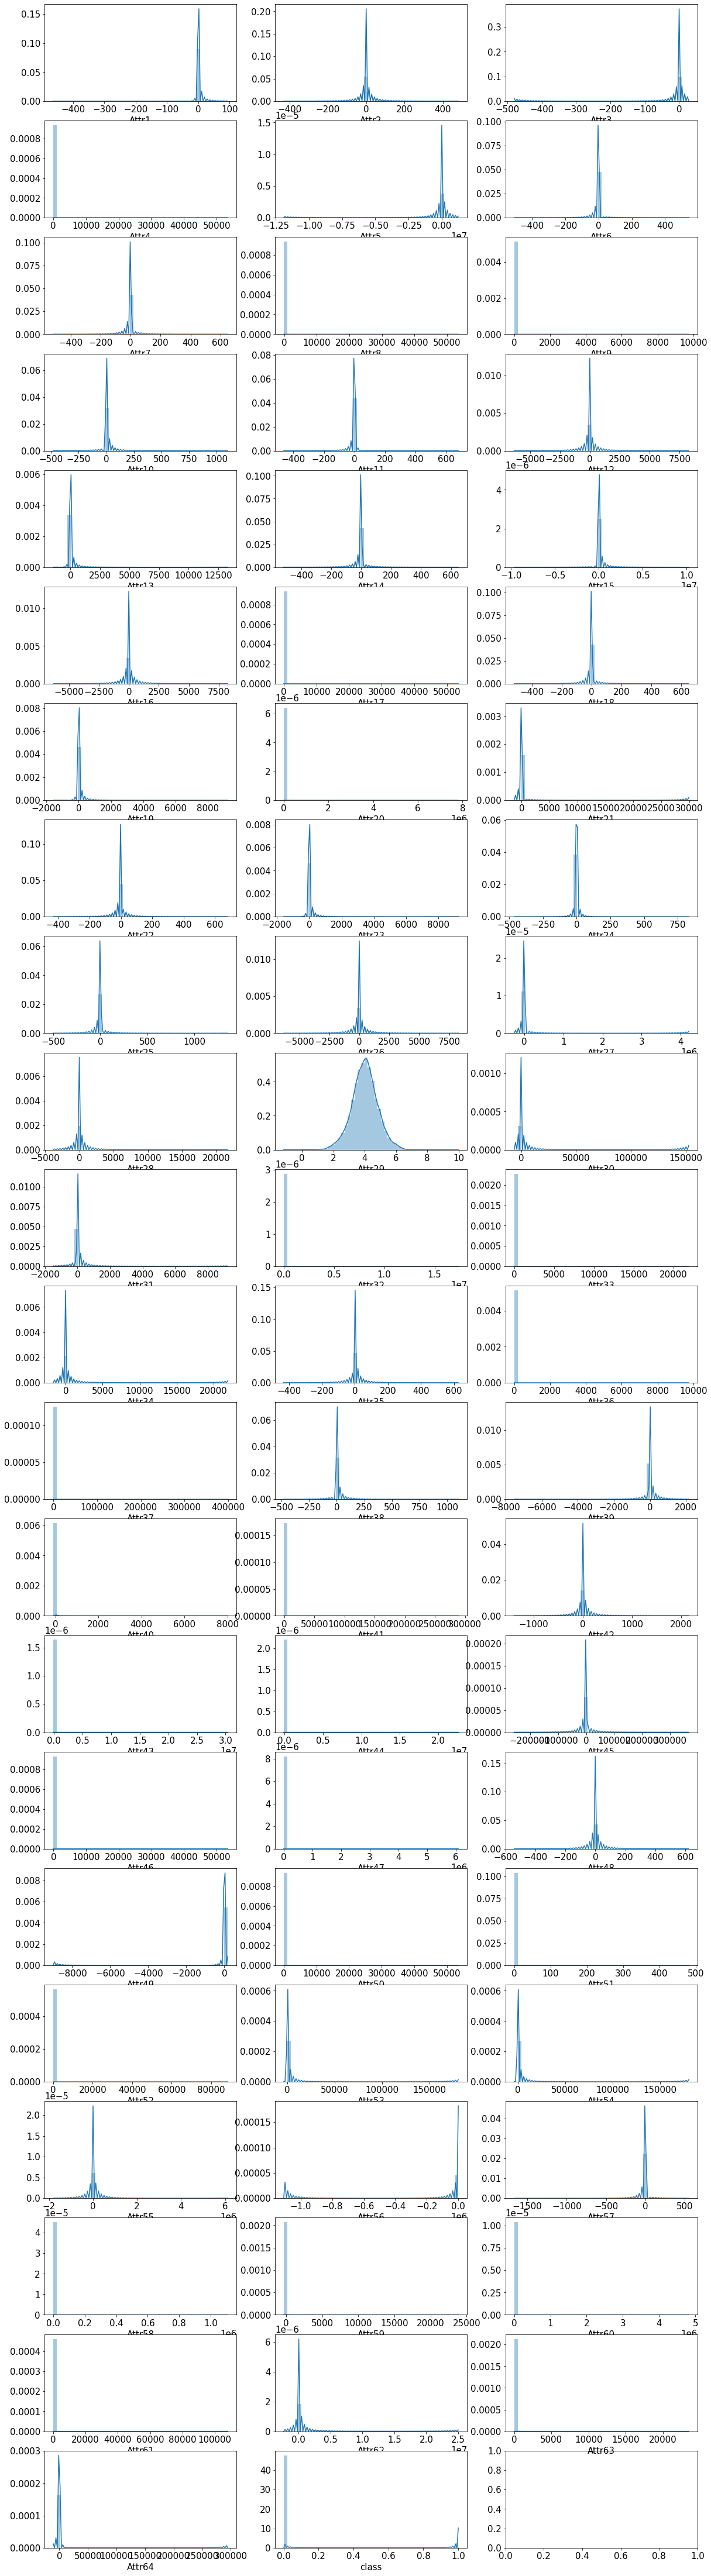

In [21]:
plt.subplots(22,3, figsize=(20,80))
i = 1
for c in df.columns[:65]:
    plt.subplot(22,3,i)             
    sbn.distplot(df[c])
    #plt.title(c)
    i+= 1

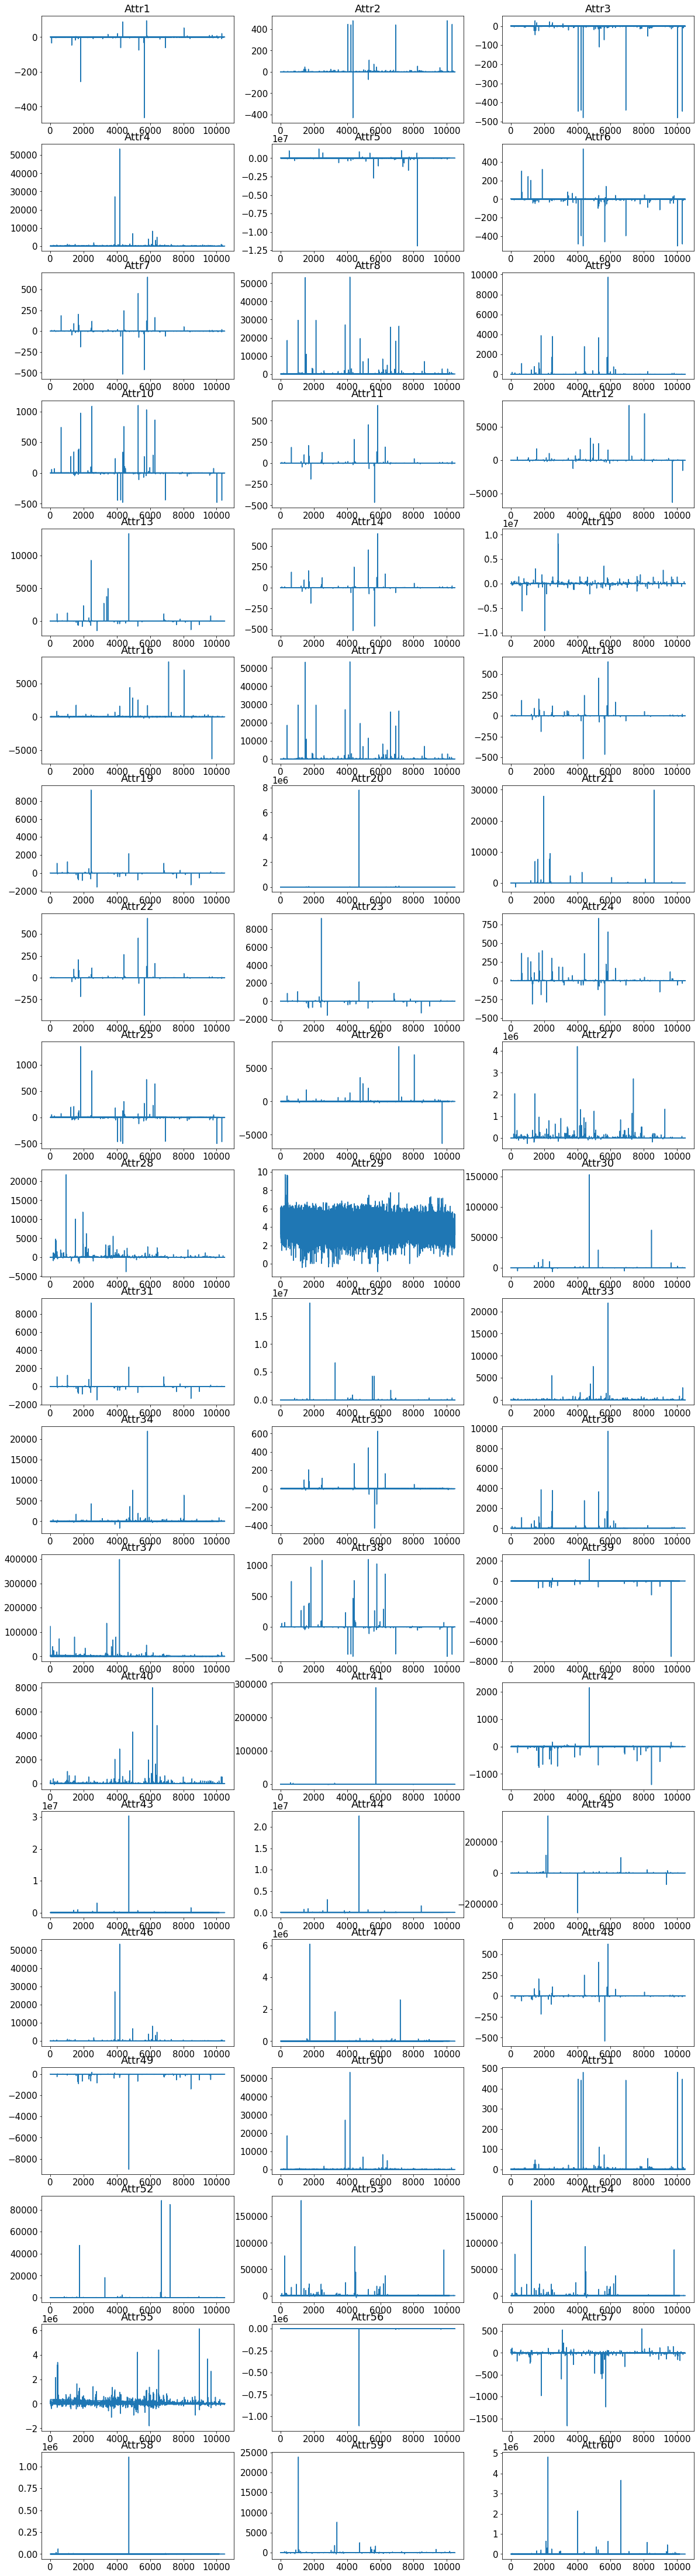

In [22]:
plt.subplots(20,3, figsize=(20,80))
i = 1
for c in df.columns[:60]:
    plt.subplot(20,3,i)             
    plt.plot(df[c])
    plt.title(c)
    i+= 1

## Visualise Target Distribution:

Plotting the distribution of the target variable


Text(0.5, 1.0, 'Target distribution')

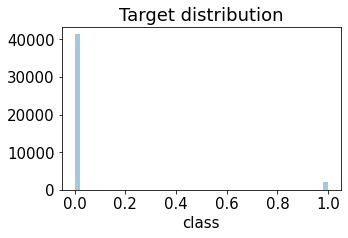

In [23]:
import seaborn as sbn
plt.figure(figsize=(5,3))
sbn.distplot(df['class'], kde=False, )
plt.title("Target distribution")

In [24]:
df.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'class', 'year'],
      dtype='object')

## Scaling:

In [0]:
x = df[set(df.columns) - set(['class'])]
y = df['class']

In [26]:
print(x.shape)
y.shape

(43405, 65)


(43405,)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x.copy())
x = pd.DataFrame(scaled_x, x.index, columns=x.columns)

In [0]:
del scaled_x

## Splitting data:

Splitting data into train (60%), validation (20%) and test (20%) sets.

In [0]:
from sklearn.model_selection import train_test_split
# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.6
ratio_val = 0.2
ratio_test = 0.2

# Produces test split.
x_remaining, x_test, y_remaining, y_test = train_test_split(x, y, 
                                                            test_size=ratio_test, 
                                                            stratify=y, 
                                                            random_state=24)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
x_train, x_val, y_train, y_val = train_test_split(x_remaining, y_remaining, 
                                                    test_size=ratio_val_adjusted, 
                                                    stratify=y_remaining, 
                                                    random_state=24)
del x_remaining, y_remaining

In [30]:
print("Shape of training data: ", x_train.shape)
print("Shape of training data: ", x_val.shape)
print("Shape of training data: ", x_test.shape)

Shape of training data:  (26043, 65)
Shape of training data:  (8681, 65)
Shape of training data:  (8681, 65)


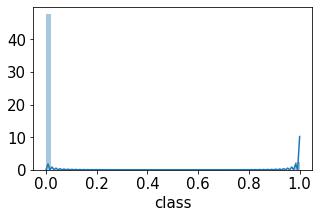

In [31]:
plt.figure(figsize=(5,3))
sbn.distplot(y_train);

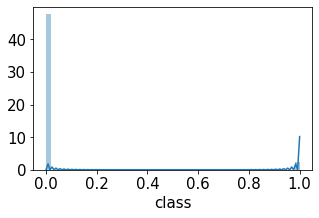

In [32]:
plt.figure(figsize=(5,3))
sbn.distplot(y_val);

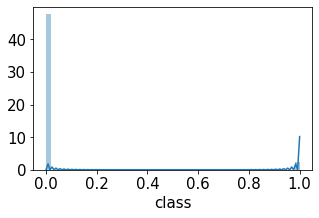

In [33]:
plt.figure(figsize=(5,3))
sbn.distplot(y_test);

# Combined Model

In [40]:
model = Sequential()
model.add(Reshape( (13,5), input_shape=(x_train.shape[-1],)) )
model.add(Conv1D(256, 3, activation='sigmoid'))
model.add(Conv1D(125, 3, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(.5))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 13, 5)             0         
_________________________________________________________________
conv1d (Conv1D)              (None, 11, 256)           4096      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 9, 125)            96125     
_________________________________________________________________
flatten (Flatten)            (None, 1125)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                72064     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4

In [43]:
print('Train...')
BATCH_SIZE = 2048

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=100,
          callbacks = [early_stopping],
          validation_data=(x_val, y_val))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=BATCH_SIZE)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Epoch 1/100
13/13 [==============================] - 5s 374ms/step - loss: 0.3855 - accuracy: 0.8685 - val_loss: 0.2218 - val_accuracy: 0.9518
Epoch 2/100
13/13 [==============================] - 4s 345ms/step - loss: 0.2441 - accuracy: 0.9484 - val_loss: 0.1949 - val_accuracy: 0.9518
Epoch 3/100
13/13 [==============================] - 4s 342ms/step - loss: 0.2190 - accuracy: 0.9512 - val_loss: 0.1935 - val_accuracy: 0.9518
Epoch 4/100
13/13 [==============================] - 5s 347ms/step - loss: 0.2147 - accuracy: 0.9515 - val_loss: 0.1955 - val_accuracy: 0.9518
Epoch 5/100
13/13 [==============================] - 4s 342ms/step - loss: 0.2153 - accuracy: 0.9517 - val_loss: 0.1966 - val_accuracy: 0.9518
Epoch 6/100
13/13 [==============================] - 4s 343ms/step - loss: 0.2144 - accuracy: 0.9518 - val_loss: 0.1967 - val_accuracy: 0.9518
Epoch 7/100
13/13 [==============================] - 4s 341ms/step - loss: 0.2124 - accuracy: 0.9518 - val_loss: 0.1965 - val_accurac

In [0]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[5].output)
intermediate_layer_train_output = intermediate_layer_model.predict(x_train)
intermediate_layer_val_output = intermediate_layer_model.predict(x_val)
intermediate_layer_test_output = intermediate_layer_model.predict(x_test)

In [0]:
#Taking the output an intermediate layer of CNN as the input of KNeighbours Classifier
train_x = intermediate_layer_train_output[0:4000]
train_y = y_train[0:4000]
test_x = intermediate_layer_test_output[0:5000]
test_y = y_test[0:5000]

In [57]:
print("train_x shape = ", train_x.shape)
print("train_y shape = ", train_y.shape)
print("test_x shape = ", test_x.shape)
print("test_y shape = ", test_y.shape)

train_x shape =  (4000, 64)
train_y shape =  (4000,)
test_x shape =  (5000, 64)
test_y shape =  (5000,)


In [0]:
neighbors = np.arange(2,10)
rmse_val = []
train_rmse_val = []
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_y)
    pred = knn.predict(test_x) 
    error = sqrt(mean_squared_error(test_y,pred))
    rmse_val.append(error)
    pred = knn.predict(train_x) 
    error = sqrt(mean_squared_error(train_y,pred))
    train_rmse_val.append(error)

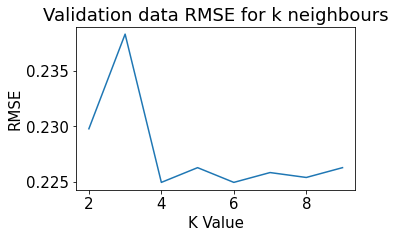

In [59]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(2,10), rmse_val)
plt.title("Validation data RMSE for k neighbours")
plt.xlabel("K Value")
plt.ylabel("RMSE");

In [0]:
train_x = intermediate_layer_train_output
val_x = intermediate_layer_val_output
test_x = intermediate_layer_test_output

In [61]:
t = time.time()
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(train_x, y_train)
print("Traning Accuracy: ", knn.score(train_x, y_train))
print("Validation Accuracy: ", knn.score(val_x, y_val))
print("Test Accuracy: ", knn.score(test_x, y_test))
t = np.round(time.time() - t, 2)
print("Time taken to run the model: ", t)

Traning Accuracy:  0.9524248358484045
Validation Accuracy:  0.9520792535422187
Test Accuracy:  0.9511577007257228
Time taken to run the model:  11.18
